**Tabla de Contenido**<a id='toc0_'></a>    
- [¿El juego tiene exito o no?](#toc1_)    
  - [Descripción del proyecto](#toc1_1_)    
  - [Diccionario de datos](#toc1_2_)    
- [Inicializar las librerías](#toc2_)    
- [Funciones](#toc3_)    
- [Carga de datos](#toc4_)    
- [EDA](#toc5_)    
- [Preparar los datos](#toc6_)    
  - [Formato al nombre de las columnas](#toc6_1_)    
  - [Eliminar duplicados](#toc6_2_)    
    - [Duplicados explícitos](#toc6_2_1_)    
    - [Duplicados implícitos](#toc6_2_2_)    
  - [Valores ausentes](#toc6_3_)    
    - [Analisis del porcentaje de valores ausentes por columna](#toc6_3_1_)    
    - [Columnas: name y genre](#toc6_3_2_)    
    - [Columna: year_of_release](#toc6_3_3_)    
      - [Extraer el año de lanzamiento de la columna name](#toc6_3_3_1_)    
      - [Imputar por videojuegos que salieron en diferentes plataformas](#toc6_3_3_2_)    
      - [Distribuciones por plataforma y año](#toc6_3_3_3_)    
    - [Columna: critic_score](#toc6_3_4_)    
    - [Columnas: user_score](#toc6_3_5_)    
    - [Columna: rating](#toc6_3_6_)    
  - [Transformar el tipo de las columnas](#toc6_4_)    
  - [Agregar las ventas totales](#toc6_5_)    
- [Análisis de los datos](#toc7_)    
  - [Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?](#toc7_1_)    
- [¿cómo varían las ventas de una plataforma a otra?](#toc8_)    
  - [Plataformas que solían ser populares pero que ahora no tienen ventas.](#toc8_1_)    
  - [¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?](#toc8_2_)    
      - [Respuesta](#toc8_2_1_1_)    
  - [Determinar para qué período debes tomar datos](#toc8_3_)    
    - [¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.](#toc8_3_1_)    
    - [Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.](#toc8_3_2_)    
      - [¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.](#toc8_3_2_1_)    
  - [¿Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular?](#toc8_4_)    
  - [Comparar las ventas de los mismos juegos en otras plataformas.](#toc8_5_)    
  - [Echa un vistazo a la distribución general de los juegos por género](#toc8_6_)    
    - [¿Qué se puede decir de los géneros más rentables?](#toc8_6_1_)    
    - [¿Puedes generalizar acerca de los géneros con ventas altas y bajas?](#toc8_6_2_)    
- [Crear un perfil de usuario para cada región](#toc9_)    
  - [5 Plataformas principales](#toc9_1_)    
  - [5 géneros principales](#toc9_2_)    
  - [Si las clasificaciones de ESRB afectan a las ventas en regiones individuales](#toc9_3_)    
- [Prueba las siguientes hipótesis:](#toc10_)    
  - [¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas?](#toc10_1_)    
  - [¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?](#toc10_2_)    
- [Conlcusión general](#toc11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Videojuegos ¿El juego tiene exito o no?](#toc0_)

## <a id='toc1_1_'></a>[Descripción del proyecto](#toc0_)

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.  
  
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)  
  
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## <a id='toc1_2_'></a>[Diccionario de datos](#toc0_)

- Name: Nombre
- Platform: Plataforma.
- Year_of_Release: Año de lanzamiento.
- Genre: Género.
- NA_sales: ventas en Norteamérica en millones de dólares estadounidenses. 
- EU_sales: ventas en Europa en millones de dólares estadounidenses.
- JP_sales: ventas en Japón en millones de dólares estadounidenses.
- Other_sales: ventas en otros países en millones de dólares estadounidenses.
- Critic_Score: calificación de crítica (máximo de 100). 
- User_Score: calificación de usuario (máximo de 10).
- Clasificación: clasificación del software de entretenimiento ESRB.  
Nota: Es posible que los datos de 2016 estén incompletos.

# <a id='toc2_'></a>[Inicializar las librerías](#toc0_)

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

# <a id='toc3_'></a>[Funciones](#toc0_)

In [2]:
def split_year_from_name(game):
    '''
    Esta función extrae 4 dígitos del nombre del nombre del videojuego.
    
    in: Cada fila del dataset
    out: año del videojuego (int)
    
    '''
    # Solo extraer los dígitos solo si no existe un valor en la columna del año
    if pd.isna(game['year_of_release']):
        # Extrer 4 dígitos del nombre del videojuego, convertirlo a int
        year = re.search(r'\b\d{4}\b', game['name'])
        
        # Si detecta 4 digitos los extrae en caso contrarior devuelve nan
        if year:
            year = int(year.group())
        else:
            year = np.nan
    # En caso de que la fila contenga un año de lanzamiento regresar ese valor
    else:
        year = game['year_of_release']
        
    # Regresar el año que se extrajo del nombre (int)
    return year

# <a id='toc4_'></a>[Carga de datos](#toc0_)

In [3]:
df_games = pd.read_csv('../datasets/games.csv')

# <a id='toc5_'></a>[EDA](#toc0_)

In [4]:
# Mostrar las primeras filas para ver el contenido del dataframe
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Ver si existen valores ausentes por columna, tipos de datos de las columnas y total de filas.
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Estadísticas descriptivas
df_games.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


TODO:
- Formato al nombre de las columnas (minúsculas y snake_case)
- Eliminar valores ausentes de las columnas:
  - name
  - year_of_release
  - genre
  - critic_score
  - user_score
  - rating
- Cambiar el tipo de dato de las columnas:
  - Year_of_Release a int
  - Critic_score a int
  - User_Score a float
  
**Notas:** 
- El 25% de las ventas totales no contienen ventas para NA, EU y other sales.
- El 50% de las ventas de las ventas totales no contienen ventas en JP. 
- El juego que mas se repite es Need for Speed: Most Wanted con 12 repeticiones.
- La plataforma con mas videojuegos es PS2 con 2161 videojuegos.
- User_score contienen la muchos datos par ser determinados, 2424 datos.
- La clasificación que mas se repite es E, con 3990 datos.

# <a id='toc6_'></a>[Preparar los datos](#toc0_)

## <a id='toc6_1_'></a>[Formato al nombre de las columnas](#toc0_)

In [7]:
# Convertir los nombres de columna en minúsculas
df_games.columns = df_games.columns.str.lower()
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## <a id='toc6_2_'></a>[Eliminar duplicados](#toc0_)

### <a id='toc6_2_1_'></a>[Duplicados explícitos](#toc0_)

In [8]:
# Verificar si existen duplicados explícitos
df_games.duplicated().sum()

0

No hay observaciones totalmente duplicadas.

### <a id='toc6_2_2_'></a>[Duplicados implícitos](#toc0_)

In [9]:
# Verificar que las plataformas sean unicas
platform_uniques = df_games['platform'].sort_values().unique()
platform_uniques

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

No hay plataformas duplicadas

In [10]:
# Verificar que las géneros sean únicos
genres_uniques = df_games['genre'].sort_values().unique()
genres_uniques

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

No hay géneros duplicados.

In [11]:
# Verificar que la clasificación ESBR sean únicos
rating_uniques = df_games['rating'].sort_values().unique()
rating_uniques

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

No hay clasificaciones duplicadas.

## <a id='toc6_3_'></a>[Valores ausentes](#toc0_)

### <a id='toc6_3_1_'></a>[Analisis del porcentaje de valores ausentes por columna](#toc0_)

In [12]:
# Mostrar el porcentaje de valores ausentes por columna
df_games.isna().sum() / len(df_games) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

TODO:
- name y genre: representan un valor muy bajo. Ademas comparten las mismas dos filas. Seran eliminadas. 
- year_of_release: Se extraera el año del título para algunos videojuegos. Tambien se imputara por aquellos videojuegos que compartan nombre ya que estos suelen salir en multiplataforma el mismo año. 
- Al tener una cantidad de datos ausentes muy grande (51% de datos ausentes para critic_score y 40% para user_score) eliminarlos o imputarlos creara sesgo en la información. Para este caso, lo  óptimo sería contar con una fuente de datos externa que pudiera complementar o incrementar los datos. Como no se cuenta con una fuente externa, lo mejor sera mantener los valores en NaN para no distorsionar los análisis posteriores.
- Para rating, se cambiara el valor ausente por la etiqueta 'Unknown'

### <a id='toc6_3_2_'></a>[Columnas: name y genre](#toc0_)

In [13]:
# Al ser solo 2 valores ausentes, analizare las filas con valores ausentes.
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Efectivamente son la misma columna

In [14]:
# Eliminar observaciones con los valores ausentes
df_games.dropna(subset=['name', 'genre'], inplace=True)

# Verificar los cambios
df_games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

### <a id='toc6_3_3_'></a>[Columna: year_of_release](#toc0_)

In [15]:
df_games[df_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se observan que algunos videojuegos contienen el año en el nombre, vamos a extraer el año del nombre y pasarlo a la columna year_of_release.

#### <a id='toc6_3_3_1_'></a>[Extraer el año de lanzamiento de la columna name](#toc0_)

In [16]:
# Rellenar los valores ausentes del año usando el año extraido del nombre
df_games['year_of_release'] = df_games.apply(split_year_from_name, axis=1)

# Mostrar los valores ausentes restantes en porcentaje
df_games.isna().sum()*100/len(df_games)

name                0.000000
platform            0.000000
year_of_release     1.507808
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating             40.471489
dtype: float64

Solo 17 valores fueron recuperados. 

#### <a id='toc6_3_3_2_'></a>[Imputar por videojuegos que salieron en diferentes plataformas](#toc0_)

In [17]:
# Se agrupa por nombre y se imputa la mediana del año (para evitar fracciones)
df_games['year_of_release'].fillna(df_games.groupby('name')['year_of_release'].transform('median'), inplace=True)

# Mostrar los valores ausentes restantes en porcentaje
df_games.isna().sum()*100/len(df_games)

name                0.000000
platform            0.000000
year_of_release     0.831688
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating             40.471489
dtype: float64

Creo que los valores pueden ser reemplazados por la media o mediana de year_of_release por plataforma. 
Usare histogramas de los años de lanzamiento por plataforma, para saber si hay valores atípicos y decidir por la media o mediana.

#### <a id='toc6_3_3_3_'></a>[Distribuciones por plataforma y año](#toc0_)

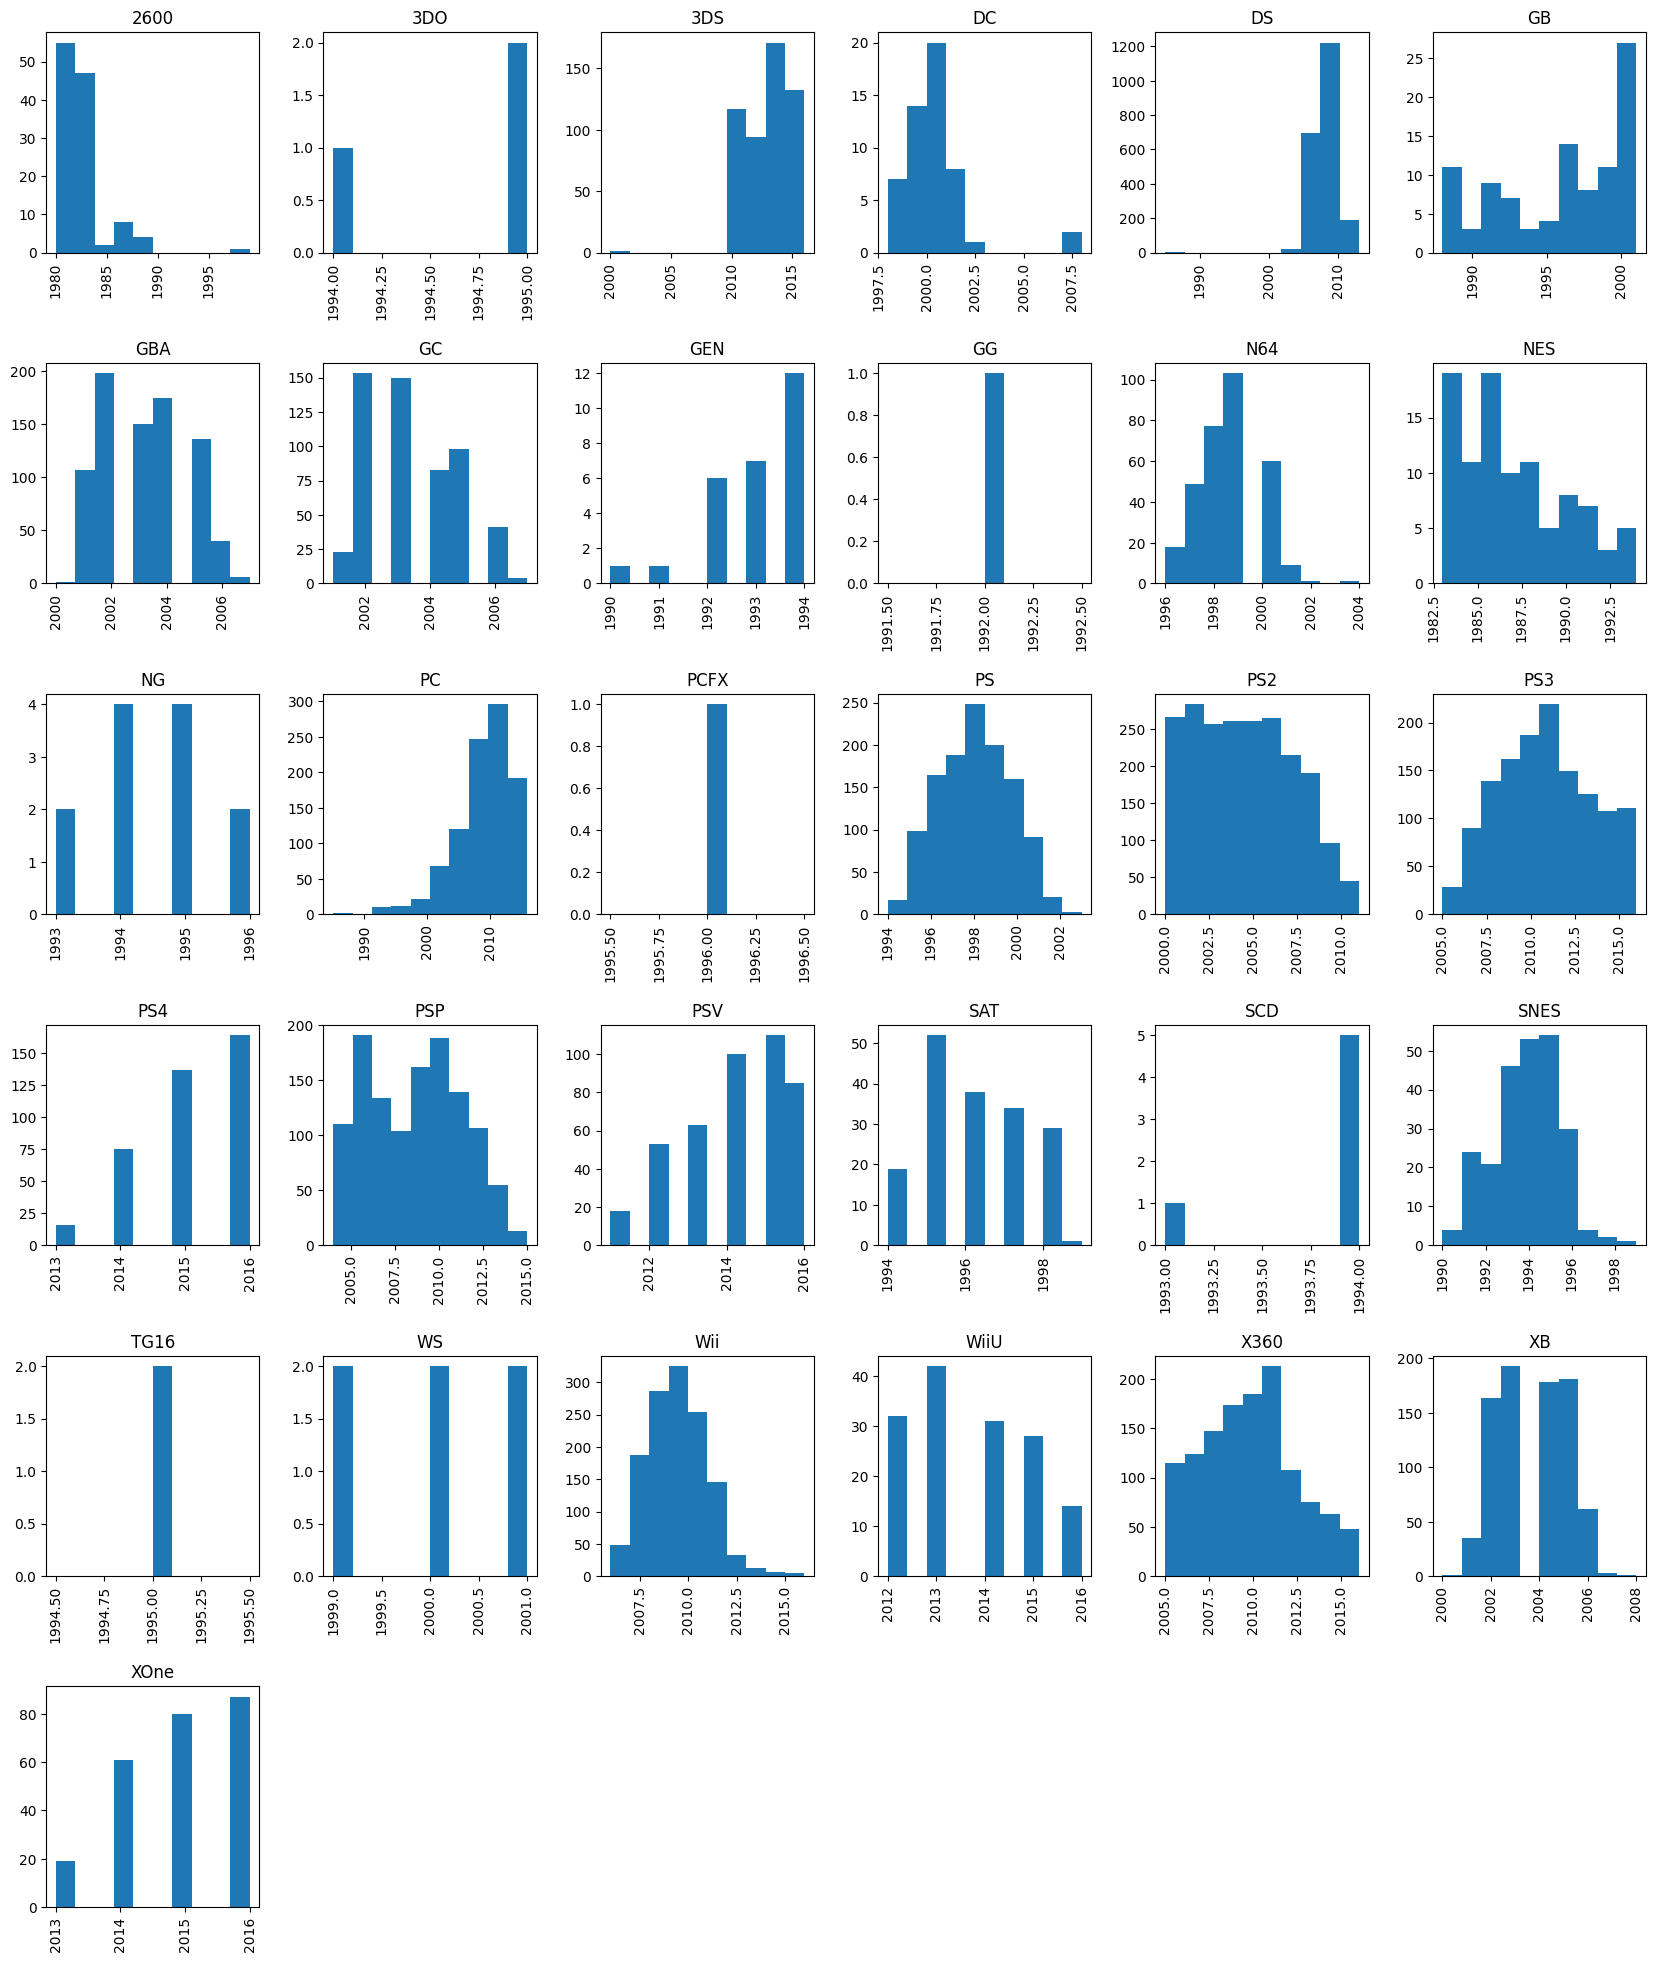

In [18]:
# Mostrar un histograma por plataforma y año
df_games.hist(by='platform',column='year_of_release',figsize=(20,25))

plt.show()

Como las distribuciones no son totalmente normales y parecen haber valores atipicos, utilizare la mediana de cada plataforma para rellenar valores ausentes.

In [19]:
# Reemplazar valores ausentes de la columna year_of_release por la mediana de cada plataforma
# Agrupar la mediana por plataforma y usar transform con la mediana, para crear una serie con todos los valores como mediana
# del dataframe original
year_median_by_platform = df_games.groupby('platform')['year_of_release'].transform('median')

# Reemplazar valores ausentes
df_games['year_of_release'].fillna(year_median_by_platform,inplace=True)

# Verificar los cambios
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

### <a id='toc6_3_4_'></a>[Columna: critic_score](#toc0_)

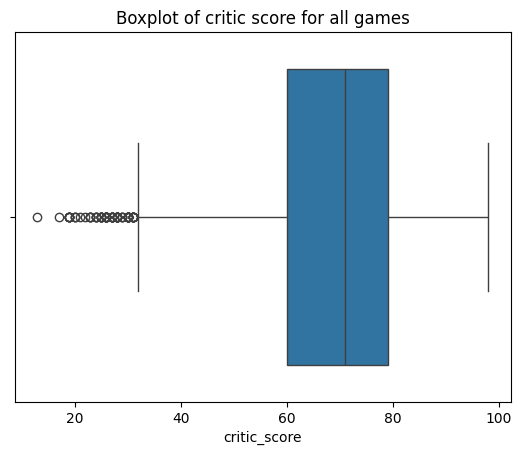

In [20]:
# Ver existen valores atípicos con un boxplot para critic_score
sns.boxplot(x=df_games['critic_score'])
plt.title('Boxplot of critic score for all games')
plt.show()

Existen muchos valores atípicos. La mediana ronda los 65. 

### <a id='toc6_3_5_'></a>[Columnas: user_score](#toc0_)

El tipo de dato es objetc, esto se debe a que contiene 'tbd' que significa to be determined. Si bien la razon es diferente a las de NaN, siguen siendo valores ausentes. Para obtener un boxplot y observar si existen valores atípicos, necesitamos valores númericos. 
  
Por esta razón reemplazare los valores 'tbd' por Nan. Ahora si, podre usar la función de boxplot.

In [21]:
# Convertir los valores tbd a NaN
df_games['user_score'].replace('tbd',np.nan, inplace=True)
# Cambiar el tipo de dato a float 
df_games['user_score'] = df_games['user_score'].astype('float64')

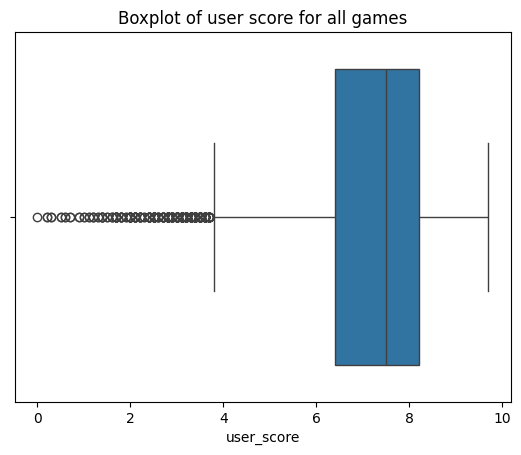

In [22]:
# Crear un boxplot para visualizar si existen valores atípicos para user_score
sns.boxplot(x=df_games['user_score'])
plt.title('Boxplot of user score for all games')
plt.show()

Existen valores atípicos. La media ronda los 7.5. 

### <a id='toc6_3_6_'></a>[Columna: rating](#toc0_)

In [23]:
# Reemplazar los valores ausentes con la palabra 'Unknown'
df_games['rating'].fillna('Unknown', inplace=True)

# Verificar valores ausentes
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

## <a id='toc6_4_'></a>[Transformar el tipo de las columnas](#toc0_)

In [24]:
# Analizar si es seguro cambiar el tipo de dato de float a int sin perder información
# Tomar las filas de la columna critic_score que tengan valores con decimal y no sean NaN
critic_score_is_decimal = df_games[(df_games['critic_score'] % 1 != 0) & ~(df_games['critic_score'].isna())]
critic_score_is_decimal

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Es seguro cambiar el tipo de dato de la columna *critic_score* de float a int sin perder información. Ya que no existe ningun dato con decimal.

In [25]:
# Analizar si es seguro cambiar el tipo de dato de object a category 
# Se analizara sin son pocos valores categoricos
df_games['rating'].value_counts()

Unknown    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

Es posible cambiar el tipo de categoria de object a categorico

In [26]:
# Cambio del tipo de dato de las columnas al correspondiente
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
df_games['critic_score'] = df_games['critic_score'].astype('Int64')
df_games['rating'] = df_games['rating'].astype('category')

# Verificar cambios
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  object  
 2   year_of_release  16713 non-null  int32   
 3   genre            16713 non-null  object  
 4   na_sales         16713 non-null  float64 
 5   eu_sales         16713 non-null  float64 
 6   jp_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     8137 non-null   Int64   
 9   user_score       7590 non-null   float64 
 10  rating           16713 non-null  category
dtypes: Int64(1), category(1), float64(5), int32(1), object(3)
memory usage: 1.4+ MB


## <a id='toc6_5_'></a>[Agregar las ventas totales](#toc0_)

In [27]:
# Calcular las ventas totales
# ventas totales = suma de las ventas de cada región
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
# Verificar la nueva columna
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,Unknown,31.38


**Notas**:

**Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.**  
  
Se cambio el tipo de datos de 3 columnas:
1. critic_score: Contenia un tipo de dato flotante. Sin embargo las calificaciones iban del 0 al 100, como números enteros. Se realizo una comprobación para ver si el dataframe contenia algún valor con decimal, pero no hubo ninguno. Fue seguro cambiar el tipo de dato de flotante a entero.

2. year_of_release: Contiene fechas, las cuales son números enteros. El tipo de dato en el dataframe fue flotante, asi que se realizo el cambio de flotante a entero.

3. rating: Este último se pudo dejar igual, con valor string. Sin embargo al contener datos categoricos y ser relativamente pocos. Se cambio de object (string) a category. 
  
**Si es necesario, elige la manera de tratar los valores ausentes:**  
**- Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.**  
  
- Para las columnas con valores string.
    1. name, genre: solo contenia 2 valores y compartian las mismas filas. Fue eliminada. 
    2. rating: contenia un porcentaje alto de valores ausentes. Creo que usar el valor mas repetido no seria lo correcto, preferi utilizar un valor alterno como 'unknown'.
- Para las columnas con valores númericos.
    1. year_of_release: Se agrupo por nombre y se utilizo la mediana del año de lanzamiento para imputar sobre los mismos nombres con valores ausentes en el año de lanzamiento. Tambien creo una función que recuperaba el año de la columna 'name', esta función recupero 17 valores de año. Finalmente se utilizo la mediana de la plataforma a la que pertenece el valor, cada plataforma ocurre en periodos especificos, por esa razon solo tome la mediana para cada plataforma.   
    2. critic_score: al contener tantos valores ausentes (un 51%) y no contar con una fuente de datos externa para complementar la información, se opto por dejar los valores ausentes para evitar un sesgo de información.
    3. user_score: se cambio el valor de 'tbd' por valores nan, para poder analizar la columna como valores númericos. Al igual que con critic_score, se tiene un alto porcentaje de valores ausentes (40%) para evitar sesgo en la información se dejarOn como valores ausentes.
  
  
**- ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**
  
Descubrí que algunas plataformas como 2600, no presentaban calificaciones (user_score, critic_score o rating). Los primeros años del dataframe ninguna plataforma tenia estos datos, hasta que empezaron los videojuegos para PC. Probablemente antes no era comun calificar los videojuegos. 
La columna genre tenia valores ausentes porque depende de la columna name que tambien estaba ausente. 
  
**- Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.**
  
Se manejaron como nan para el análisis. Si bien en un futuro pueden dar los usuarios su calificación, de momento no se cuenta con esos datos.

# <a id='toc7_'></a>[Análisis de los datos](#toc0_)

## <a id='toc7_1_'></a>[Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?](#toc0_)

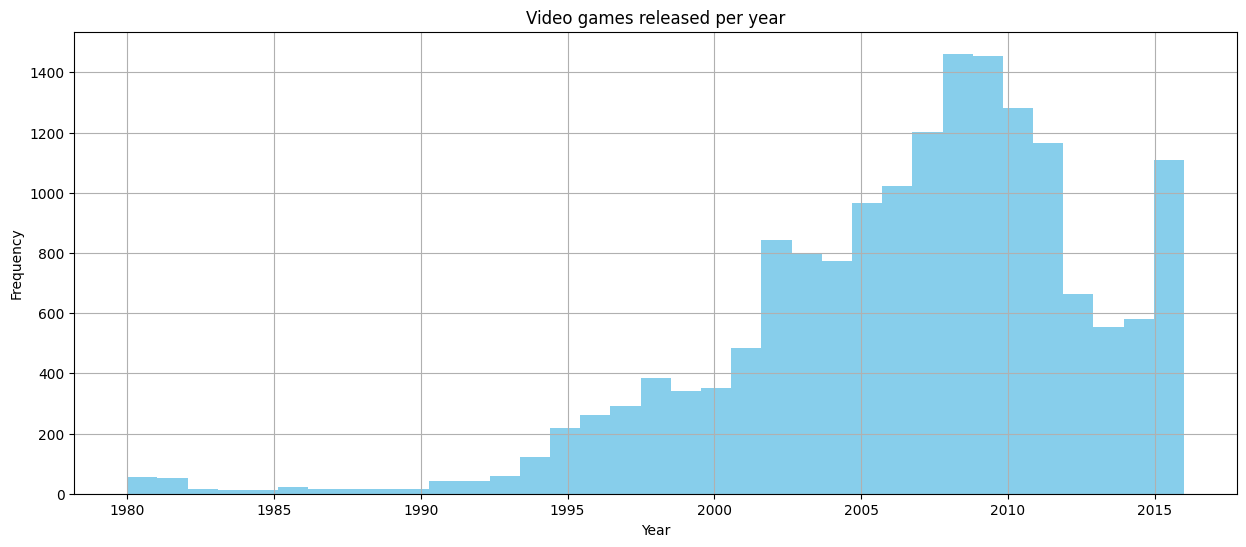

In [28]:
# Histograma de los vieojuegos lanzados por año
df_games['year_of_release'].plot(kind='hist', bins=35, figsize=(15,6), grid=True, color='skyblue')
plt.title('Video games released per year')
plt.xlabel('Year')
plt.show()

In [29]:
# Agrupar por las ventas por año
games_per_year = df_games.groupby('year_of_release')['name'].count()

# Ver las estadisticas descriptivas
games_per_year.describe()

count      37.000000
mean      451.702703
std       460.579036
min         9.000000
25%        41.000000
50%       341.000000
75%       773.000000
max      1462.000000
Name: name, dtype: float64

Notas:
- Hay una notable diferencia a lo largo del tiempo. A partir de 1993 los juegos vendidos por año empezaron a crecer significativamente. 
- 1980 Fue el año donde menos ventas hubo, 9 videojuegos vendidos. 
- En 2009 fue el año donde mas ventas hubo, 1475 videojuegos vendidos. Sin embargo, las ventas disminuyeron en los siguienes años.
- Hay 37 años en el dataset desde 1980 a 2016.
- El promedio en ventas es de 451.75 videojuegos.
- El primer cuartil tiene ventas inferiores a 41 videojuegos por año. Es muy poco considerando el máximo de 1475. 
- El 75% de los datos tiene la mitad de ventas que la media. 

# <a id='toc8_'></a>[¿cómo varían las ventas de una plataforma a otra?](#toc0_)

Seleccionar las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

In [30]:
# Agrupar ventas por plataforma, ordenan ascendente y top 10
games_by_platform = df_games.groupby('platform')['name'].count().sort_values(ascending=False)

# Tomar las primeras 10
games_by_platform_top_10 = games_by_platform[:10]
games_by_platform_top_10

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: name, dtype: int64

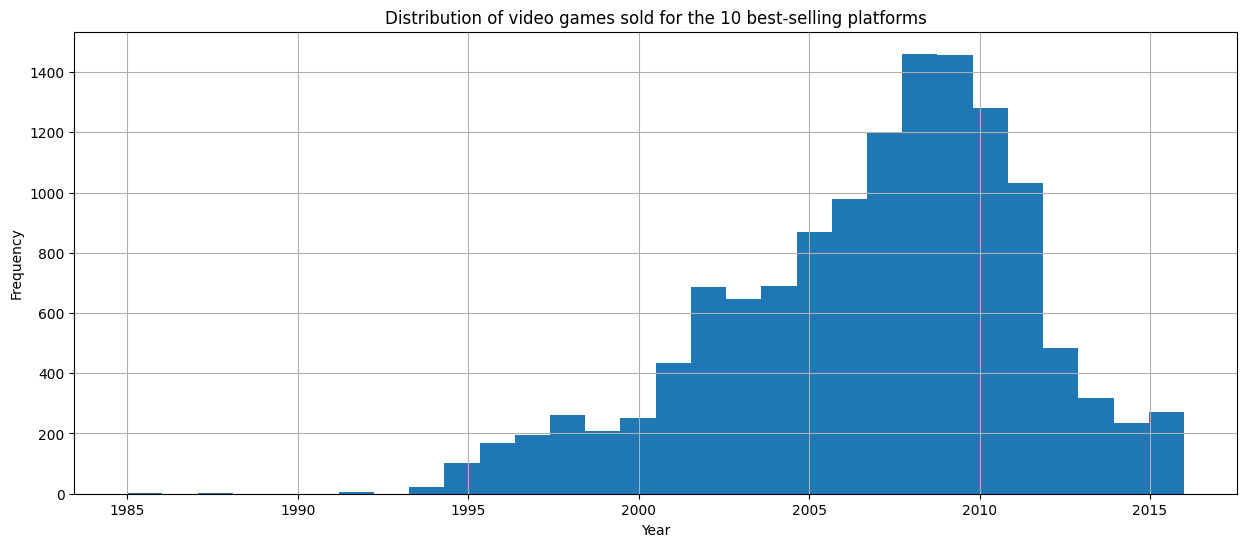

In [31]:
# Distrubución basada en los datos de cada año

# Filtro del top 10 plataformas 
df_games_top_10_platforms = df_games[df_games['platform'].isin(games_by_platform_top_10.index)]

# Crear un histograma
df_games_top_10_platforms['year_of_release'].plot(kind='hist', bins=30, figsize=(15,6), grid=True)

plt.title('Distribution of video games sold for the 10 best-selling platforms')
plt.xlabel('Year')
plt.show()

La distribución de las 15 plataformas con mas ventas es muy similar al dataframe total. Eso significa que las ventas entre plataformas varia mucho. 

## <a id='toc8_1_'></a>[Plataformas que solían ser populares pero que ahora no tienen ventas.](#toc0_)

In [32]:
# Plataformas que tuvieron ventas en 2016
platforms_2016 = df_games[(df_games['year_of_release']==2016)]['platform'].sort_values().unique()
platforms_2016

array(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'],
      dtype=object)

In [33]:
# 10 plataformas mas populares en Serie para poder filtrar
serie_games_by_platform_top_10 = pd.Series(games_by_platform_top_10.index)
serie_games_by_platform_top_10.sort_values()

1      DS
9     GBA
7      PC
6      PS
0     PS2
2     PS3
5     PSP
3     Wii
4    X360
8      XB
Name: platform, dtype: object

In [34]:
# Plataformas populares que tienen ventas activas en 2016
top_10_platforms_active = serie_games_by_platform_top_10[serie_games_by_platform_top_10.isin(platforms_2016)]
top_10_platforms_active.sort_values()

7      PC
2     PS3
3     Wii
4    X360
Name: platform, dtype: object

In [35]:
# Plataformas populares que no tienen ventas activas en 2016
top_10_platforms_inactive = serie_games_by_platform_top_10[~serie_games_by_platform_top_10.isin(platforms_2016)]
top_10_platforms_inactive

0    PS2
1     DS
5    PSP
6     PS
8     XB
9    GBA
Name: platform, dtype: object

## <a id='toc8_2_'></a>[¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?](#toc0_)

In [36]:
# Obtener un dataframe con las plataformas mas populares y activas en 2016
df_games_active = df_games[df_games['platform'].isin(top_10_platforms_active)]
df_games_active.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32


In [37]:
# Obtener un dataframe con las plataformas mas populares e inactivas en 2016
df_games_inactive = df_games[df_games['platform'].isin(top_10_platforms_inactive)]
df_games_inactive.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,Unknown,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91,8.6,E,23.21
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77,7.9,E,20.14


In [38]:
# Agrupar plataformas activas por fechas y ventas totales
platforms_active_by_year = df_games_active.groupby(['year_of_release','platform'])['total_sales'].sum().unstack()

# Agrupar plataformas inactivas por fechas y ventas totales
platforms_inactive_by_year = df_games_inactive.groupby(['year_of_release','platform'])['total_sales'].sum().unstack()

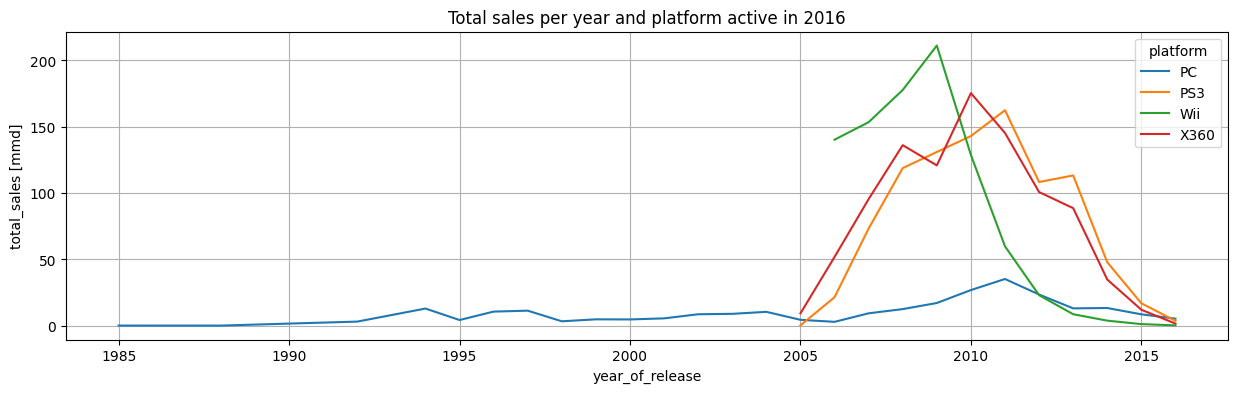

In [39]:
# Graficar las ventas a traves del tiempo par las plataformas activas
platforms_active_by_year.plot(figsize=(15,4), grid=True)
plt.title('Total sales per year and platform active in 2016')
plt.ylabel('total_sales [mmd]')
plt.show()

In [40]:
# Análisis estádistico
df_games_active['year_of_release'].describe()

count    4887.000000
mean     2009.699202
std         2.946648
min      1985.000000
25%      2008.000000
50%      2010.000000
75%      2011.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [41]:
# Calcular el tiempo promedio que dura cada plataforma

# Calcular la duración de años por platforma
platform_durations = df_games_active.groupby('platform')['year_of_release'].apply(lambda x: x.max() - x.min())

# Calcular la mediana por los valores atipicos generados por PC.
median_years = platform_durations.median()
median_years

11.0

Las plataformas activas tienen una duración promedio de 10.5 años. Considerar que podrían ser mas años alcortarse 

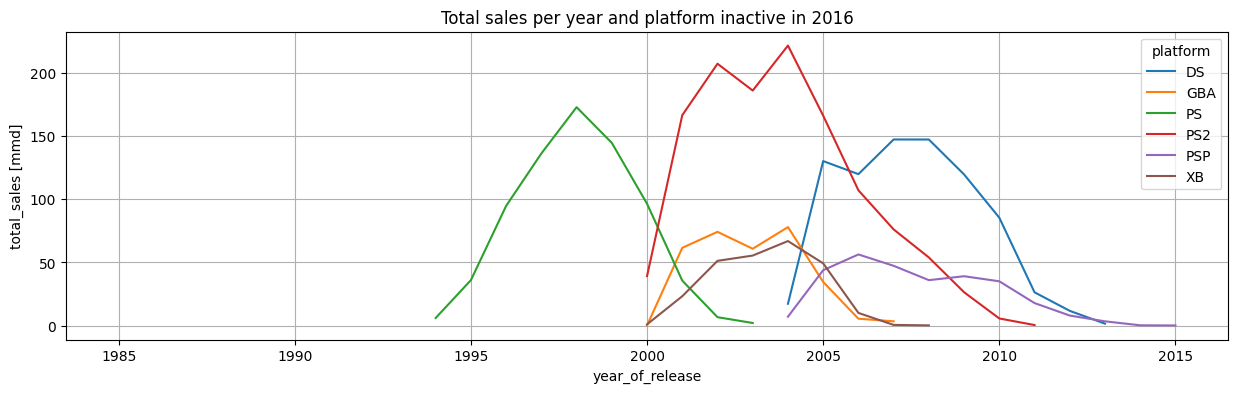

In [42]:
# Graficar las ventas a traves del tiempo para las plataformas activas
platforms_inactive_by_year.plot(figsize=(15,4), grid=True)
plt.title('Total sales per year and platform inactive in 2016')
plt.ylabel('total_sales [mmd]')
plt.show()

In [43]:
# Análisis estádistico
df_games_inactive['year_of_release'].describe()

count    8364.000000
mean     2004.939503
std         4.048631
min      1985.000000
25%      2002.000000
50%      2005.000000
75%      2008.000000
max      2015.000000
Name: year_of_release, dtype: float64

In [44]:
# Calcular el tiempo promedio que dura cada plataforma inactiva

# Calcular la duración de años por platforma
platform_durations = df_games_inactive.groupby('platform')['year_of_release'].apply(lambda x: x.max() - x.min())

# Calcular el promedio por los valores atipicos generados por PC.
mean_years = platform_durations.mean()
mean_years

12.333333333333334

Las plataformas inactivas tuvieron una duración de 12.3 años en promedio.

In [45]:
platforms_active_min = []

# Extraer el año mínimo (cuando aparecen) para cada plataforma activa
for platform in top_10_platforms_active:
    platforms_active_min.append(df_games[df_games['platform']==platform]['year_of_release'].min())
    
# Hay valores atípicos asi que se usa la mediana
np.median(platforms_active_min)

2005.0

In [46]:
platforms_inactive_min = []

# Extraer el año máximo (cuando desaparecen) para cada plataforma inctiva
for platform in top_10_platforms_inactive:
    platforms_inactive_min.append(df_games[df_games['platform']==platform]['year_of_release'].max())

# calcular el promedio
np.mean(platforms_inactive_min)

2009.5

#### <a id='toc8_2_1_1_'></a>[Respuesta](#toc0_)

Las plataformas nuevas aparecen alrededor del 2005, tienen una duración promedio de 10.5 años. Las plataformas viejas suelen desaparecer en el 2009 en promedio, tienen una duración promedio de 12.3 años.

## <a id='toc8_3_'></a>[Determinar para qué período debes tomar datos](#toc0_)

In [47]:
# Considerando que las plataformas viejas duraron 12 años y las nuevas ya llevan 10 años en el mercado. Se tomaran los datos
# de los últimos 4 años. 
# Tomare los valores a partir del 2005, cuando las plataformas nuevas aparecen. 
df_games_2013to2016 = df_games[df_games['year_of_release']>=2013]
df_games_2013to2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


### <a id='toc8_3_1_'></a>[¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.](#toc0_)

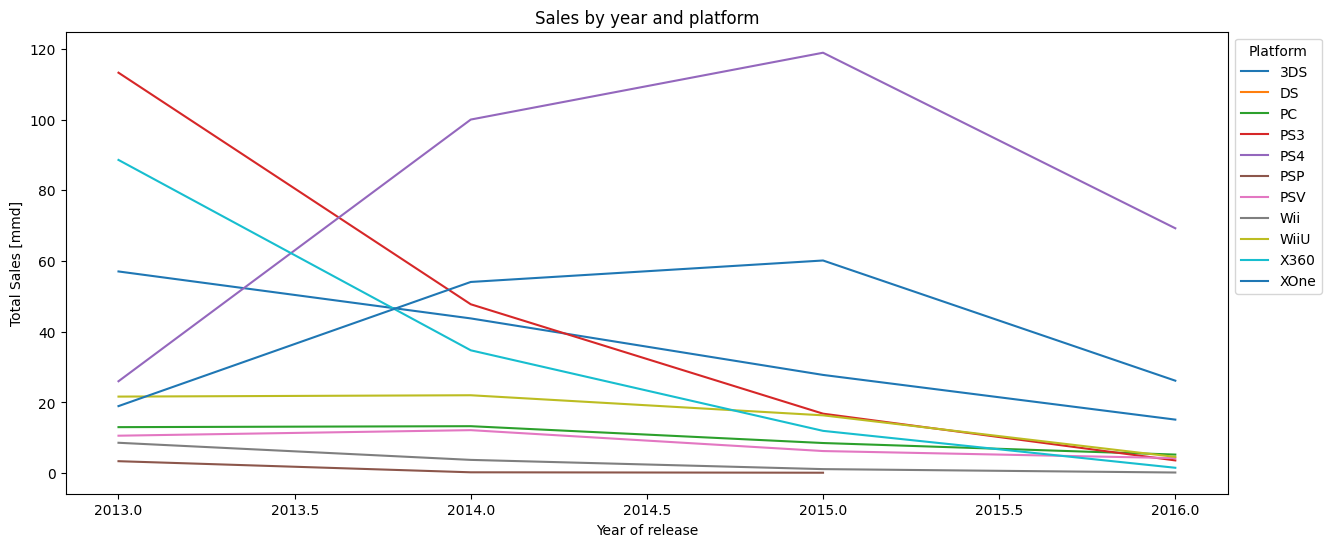

In [48]:
# Agrupar las ventas totales por plataforma y año
df_games_2013to2016_by_platform = df_games_2013to2016.groupby(['year_of_release','platform'])['total_sales'].sum().unstack()

# Crear una gráfica de lineas
df_games_2013to2016_by_platform.plot(figsize=(15,6))

plt.title('Sales by year and platform')
plt.xlabel('Year of release')
plt.ylabel('Total Sales [mmd]')
plt.legend(title='Platform', bbox_to_anchor=(1, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.show()

In [49]:
# Agrupar las plataformas por ventas en 2016
sales_by_platform_2016 = df_games[df_games['year_of_release']==2016].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sales_by_platform_2016

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

Plataformas lideres en 2016:
1. PS4 con 69.25 mdd 
2. XOne con 26.15mdd 
3. 3DS con 15.14 mdd
4. PC con 5.25 mdd
5. WiiU con 4.60 mdd

Se toman en cuenta las 3 plataformas con mas ventas en 2016.
Tambien se añadira PC como plataforma rentable debido a que es la unica plataforma constante desde 1985 y es el 4to lugar en ventas del 2016.
  
Las platformas DC, GBA, PS3 y DS, mantuvieron ventas altas, +200mdd el pico máximo. Sin embargo su tendencia va en decremento, para el 2016 no tienen ventas significativas comparados a otras plataformas. Probablemente las nuevas versiones de cada plataforma sustituyeron a la version anterior. 

No noto alguna tendencia positiva actual en 2016, me parece que todas las plataformas tienen una tendencia negativa. Quizas los videojuegos de este dataset no son populares en 2016 comparados con 2010.

### <a id='toc8_3_2_'></a>[Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.](#toc0_)

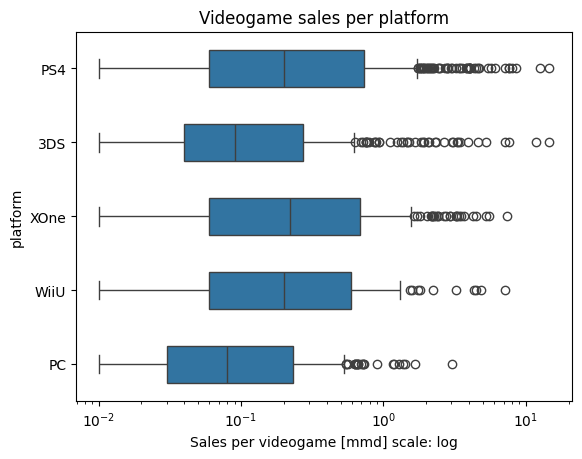

In [50]:
# Crear boxplot para cada plataforma
# Tomar las 5 plataformas líderes
leading_platforms = sales_by_platform_2016.index[:5]

# filtrar el dataset del 2005 al 2016 con las plataformas lideres
df_leading_platforms_2013to2016 = df_games_2013to2016[df_games_2013to2016['platform'].isin(leading_platforms)]

# Crear un boxplot de las ventas globales de todos los juegos por plataforma lider
sns.boxplot(data=df_leading_platforms_2013to2016,
            x='total_sales',
           y='platform',
           width=.5)
plt.title('Videogame sales per platform')
plt.xlabel('Sales per videogame [mmd] scale: log')
plt.xscale('log') # Cambiar la escala del eje x, para visualizar mejor los cuartiles. Los valores atipicos estaban muy alejados
plt.show()

#### <a id='toc8_3_2_1_'></a>[¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.](#toc0_)

Hay diferencia en la mediana y en la presencia de valores atípicos. Por lo que puede haber variaciones significativias en las ventas entre plataforma. 

- Las plataformas tienen sesgo hacia la izquierda.
- PS4 y 3DS tienen valores atípicos muy grandes. Sobrepasando los 14mmd. mientras que PC, XOne Y WiiU se mantienen entre 7-9 mdd los valores atipicos máximos.
- PS4, WiiU y XOne, mantienen cuartiles medianas similares. Sin embargo para XOne y PS4 hay una mayor distribución de los datos, entre los cuartiles del 25% al 75%. 

## <a id='toc8_4_'></a>[¿Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular?](#toc0_)

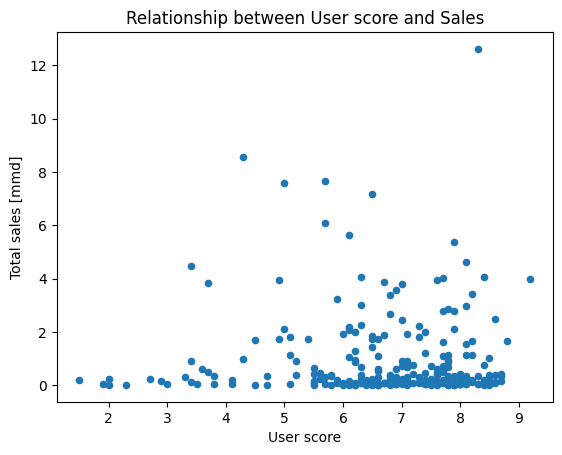

In [51]:
# Filtrar dataset del 2013 al 2016 para la plataforma PS4
PS4_2013to2016 = df_leading_platforms_2013to2016[df_leading_platforms_2013to2016['platform']=='PS4']

# Graficar un scatterplot calificacion del usuario vs ventas
PS4_2013to2016.plot(kind='scatter',
                   x='user_score',
                   y='total_sales')
plt.title('Relationship between User score and Sales')
plt.ylabel('Total sales [mmd]')
plt.xlabel('User score')
plt.show()

In [52]:
# Calcular la correlación de user score y ventas
correlation_user = PS4_2013to2016['user_score'].corr(PS4_2013to2016['total_sales'])
print(f"Correlation between user user score and sales: {correlation_user}")

Correlation between user user score and sales: -0.03195711020455643


Existe una correlacion negativa muy débil, se puede considerar insignificante. Curiosamente las ventas máximas de valores atípicos si aumentan cuando aument el score, probablemente se deba a videojuegos muy populares en donde el user_score no es importante.

## <a id='toc8_5_'></a>[Comparar las ventas de los mismos juegos en otras plataformas.](#toc0_)

In [53]:
# Extraer el nombre de los juegos de PS4
PS4_2013to2016_games = PS4_2013to2016['name'].values
 
# Filtrar el dataset del 2005 al 2016 con los juegos del ps4
same_games_per_platform = df_leading_platforms_2013to2016[df_leading_platforms_2013to2016['name'].isin(PS4_2013to2016_games)]

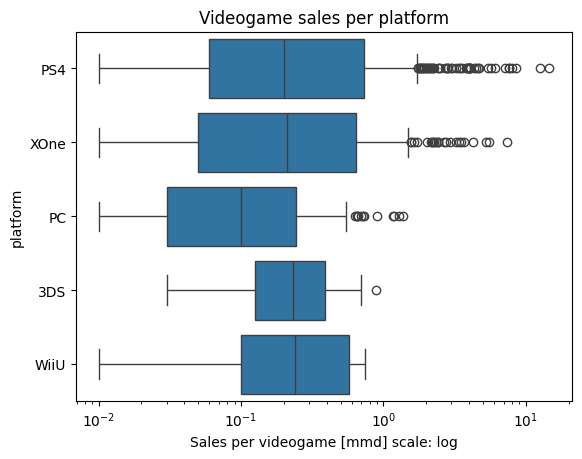

In [54]:
# Gráficar las ventas de viedojuegos por plataforma en un boxplot
sns.boxplot(data=same_games_per_platform,
            x='total_sales',
            y='platform'
            )
plt.title('Videogame sales per platform')
plt.xlabel('Sales per videogame [mmd] scale: log')
plt.xscale('log') # Cambiar la escala del eje x, para visualizar mejor los cuartiles. Los valores atipicos estaban muy alejados
plt.show()

- PS4 tiene los valores atípicos mas altos, con mas de 14mmd.
- WiiU y 3DS tienen valores maximos menores a 2mmd.
- La mediana se ve similar para todos excluyendo a PC, que es menor. 
- PS4 y XOne, tienen los una mayor distribucion de datos, entre el primer y tercer cuartil. 
- Todos los datos estan sesgados hacia la izquierda.

## <a id='toc8_6_'></a>[Echa un vistazo a la distribución general de los juegos por género](#toc0_)

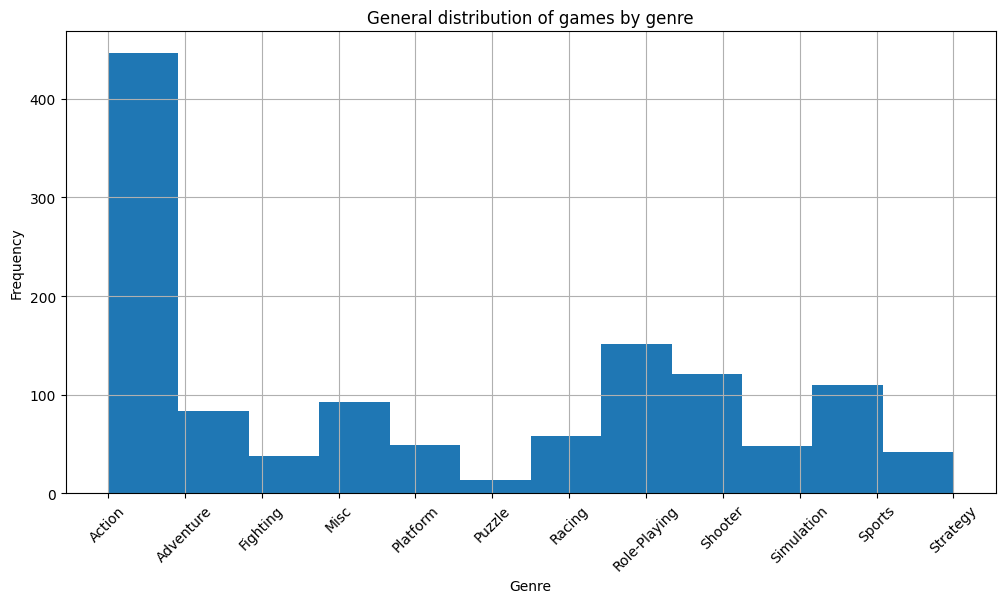

In [55]:
df_leading_platforms_2013to2016['genre'].sort_values().hist(xrot=45, bins=12, figsize=(12,6))
plt.title('General distribution of games by genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

Hay una diferencia clara, hay mas de 600 valores de juegos de accion, mientras que el segundo lugar con mas juegos tiene aproximadamente 250. 

### <a id='toc8_6_1_'></a>[¿Qué se puede decir de los géneros más rentables?](#toc0_)

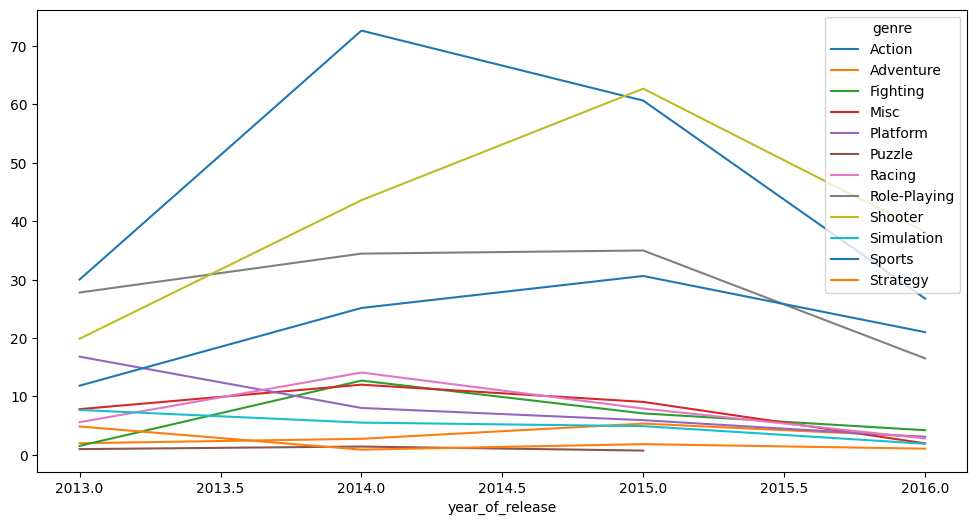

In [56]:
# Agrupar las ventas por género y año
sales_per_genre = df_leading_platforms_2013to2016.groupby(['year_of_release','genre'])['total_sales'].sum().unstack()

# Graficar las ventas por género y año
sales_per_genre.plot(figsize=(12,6))

plt.show()

In [57]:
# Agrupar las ventas totales por género 
df_leading_platforms_2013to2016.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

,genre,total_sales
0,Action,190.09
8,Shooter,164.34
7,Role-Playing,113.74
10,Sports,88.59
4,Platform,33.75
3,Misc,30.81
6,Racing,30.35
2,Fighting,25.50
9,Simulation,19.95
1,Adventure,13.12


- Hay 4 géneros con ventas notablemente altas, no solo en el 2016, sino con incrementos grandes comparados con los otros géneros. Son Action, Shooter, Role-Playing y Sports.
- Sobrepasan los 100mdd, el máximo es para Action con 190.21 mdd.
- El género con menos ventas es Puzzle con 3.07 mdd. 
- Si bien todos los juegos tienen tendencia negativa, los 4 primeros aún tienen ventas significativas comparadas con los demas.

### <a id='toc8_6_2_'></a>[¿Puedes generalizar acerca de los géneros con ventas altas y bajas?](#toc0_)

1. Ventas altas: Los juegos de accion y disparos son muy populares. Parece que las personas prefieren los juegos debido a la alta concentrción de movimiento y acción. Tambien los juegos que utilizan una experiencia mas inmersiva como los RolePlaying son populares. Parece que los jugadores prefieren experiencias envolventes.

2. Vents bajas: Juegos de nicho como los puzzle, strategy, adventure pueden ser menos atractivos para los jugadores. Puede deberse a una curva de aprendizaje alta o que atraen a un publico mas especializado.

# <a id='toc9_'></a>[Crear un perfil de usuario para cada región](#toc0_)

Para cada región (NA, UE, JP) se determina:
- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

## <a id='toc9_1_'></a>[5 Plataformas principales](#toc0_)

In [58]:
# Agrupar por las ventas por region de cada plataforma
top_platforms_by_platform = df_games_2013to2016.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum().reset_index()

# Verificar el dataframe creado
top_platforms_by_platform.head()

,platform,na_sales,eu_sales,jp_sales
0,3DS,38.58,30.98,67.84
1,DS,0.57,0.85,0.00
2,PC,11.19,25.84,0.00
3,PS3,63.50,67.81,23.35
4,PS4,108.74,141.09,15.96


In [59]:
# Top 5 Plataformas en NA 
top_5_na = top_platforms_by_platform.sort_values(by='na_sales', ascending=False)[:5][['platform','na_sales']]
top_5_na

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.58


In [60]:
# Top 5 Plataformas en EU 
top_5_eu = top_platforms_by_platform.sort_values(by='eu_sales', ascending=False)[:5][['platform','eu_sales']]
top_5_eu

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.98


In [61]:
# Top 5 Plataformas en JP 
top_5_jp = top_platforms_by_platform.sort_values(by='jp_sales', ascending=False)[:5][['platform','jp_sales']]
top_5_jp

,platform,jp_sales
0,3DS,67.84
3,PS3,23.35
6,PSV,18.66
4,PS4,15.96
8,WiiU,10.88


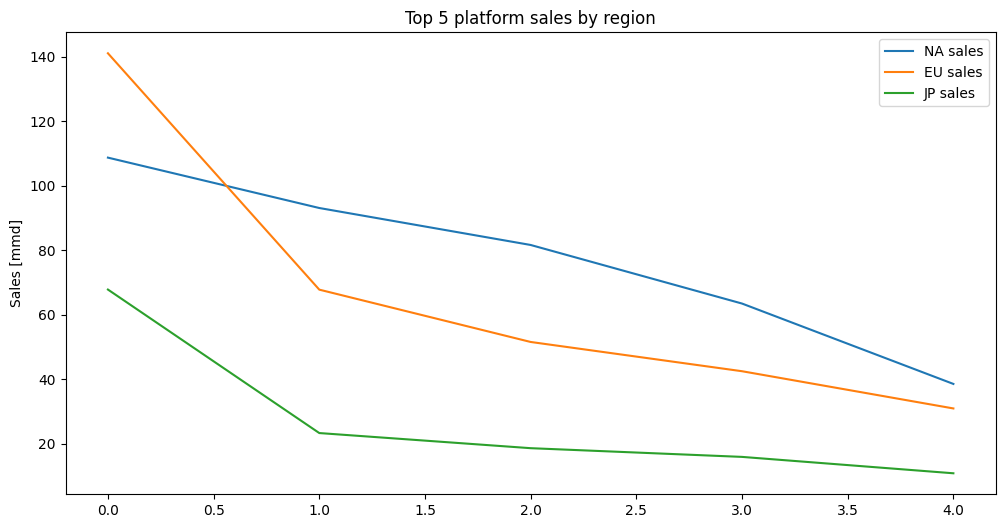

In [62]:
# Graficar las ventas del top 5 por región

# Eje x común para las tres series
eje_x = range(len(top_5_na))

# Graficar las tres regiones en la misma gráfica
plt.figure(figsize=(12,6))

plt.plot(eje_x, top_5_na['na_sales'], label='NA sales')
plt.plot(eje_x, top_5_eu['eu_sales'], label='EU sales')
plt.plot(eje_x, top_5_jp['jp_sales'], label='JP sales')

plt.ylabel('Sales [mmd]')
plt.title('Top 5 platform sales by region')
plt.legend()
plt.show()

- Las ventas en japón tienen un tendencia negativa menoso pronunciada a partir del top 2. 
- EU es el top en ventas. con 140mdd en el top 1. A partir del top Na es superior en ventas. 
- NA y EU dupilcan las ventas de JP.

1. Plataformas en NA: PS4, XOne, X360, PS3, 3DS.
    - PS4 con 108.74 mdd es el favorito. El segundo lugar XOne con 93.12 mdd. 
    - Tendencia a plataformas estacionarias.
    - Aparece XOne comparado a otras regiones.
    - Mayoria de Microsoft (3 plataformas). 
    - Las ventas del top 1 al top 5, decaen un 64%.
      
      
2. Plataformas en EU: PS4, PS3, XOne, X360, 3DS.
    - PS4 con 141.09 mdd es el favorito. El segundo lugar PS3 con 67.81 mdd. 
    - Mantiene las mismas plataformas que NA pero en diferente orden. XOne baja al 3er puesto y PS3 sube al segundo.
    - Tendencia a plataformas estacionarias.
    - Preferencia por Sony (top 1 y 2).
    - Las ventas del top 1 al top 5 decaen un 77.86%.
      
      
3. Plataformas en JP: 3DS, PS3, PSV, PS4, WiiU.
    - 3DS con 67.86 mdd es el favorito. El segundo lugar PS3 con 23.35 mdd.
    - Las ventas son muy inferiores a NA y EU.
    - Aparece la plataforma PSV y WiiU comparado a NA y EU.
    - X360 y XOne sale del top, comparado con NA y EU.
    - Tendencia a plataformas portatiles.
    - Las ventas del top 1 al top 5 decaen un 84%.

## <a id='toc9_2_'></a>[5 géneros principales](#toc0_)

In [63]:
# Agrupar las ventas por region para cada género
top_platforms_by_genre = df_games_2013to2016.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum().reset_index()

# Verificar el dataframe creado
top_platforms_by_genre.head()

,genre,na_sales,eu_sales,jp_sales
0,Action,126.13,118.61,40.49
1,Adventure,7.22,8.25,5.82
2,Fighting,15.55,8.55,7.65
3,Misc,27.49,20.04,9.44
4,Platform,18.14,15.58,4.79


In [64]:
# Top 5 Plataformas en NA 
top_5_genre_na = top_platforms_by_genre.sort_values(by='na_sales', ascending=False)[:5][['genre','na_sales']]
top_5_genre_na

,genre,na_sales
0,Action,126.13
8,Shooter,109.78
10,Sports,65.27
7,Role-Playing,46.51
3,Misc,27.49


In [65]:
# Top 5 Plataformas en EU 
top_5_genre_eu = top_platforms_by_genre.sort_values(by='eu_sales', ascending=False)[:5][['genre','eu_sales']]
top_5_genre_eu

,genre,eu_sales
0,Action,118.61
8,Shooter,87.88
10,Sports,60.52
7,Role-Playing,37.02
6,Racing,20.19


In [66]:
# Top 5 Plataformas en JP 
top_5_genre_jp = top_platforms_by_genre.sort_values(by='jp_sales', ascending=False)[:5][['genre','jp_sales']]
top_5_genre_jp

,genre,jp_sales
7,Role-Playing,51.14
0,Action,40.49
3,Misc,9.44
2,Fighting,7.65
8,Shooter,6.61


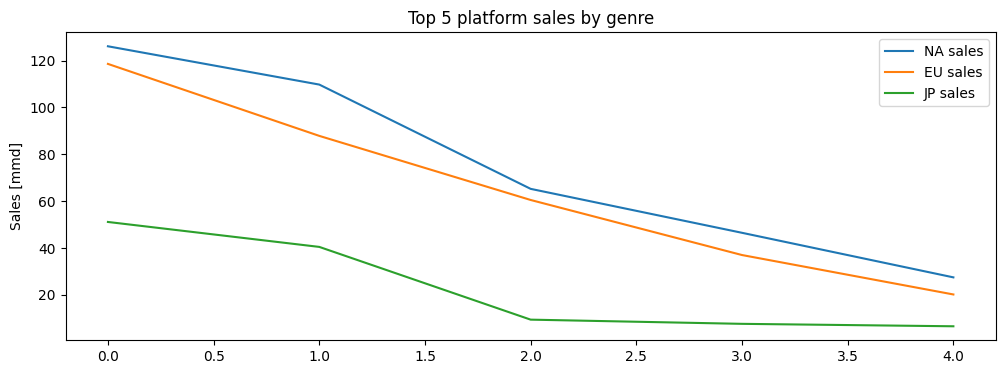

In [67]:
# Graficar las ventas del top 5 por género

# Eje x común para las tres series
eje_x = range(len(top_5_genre_na))

# Graficar las tres regiones en la misma gráfica
plt.figure(figsize=(12,4))

plt.plot(eje_x, top_5_genre_na['na_sales'], label='NA sales')
plt.plot(eje_x, top_5_genre_eu['eu_sales'], label='EU sales')
plt.plot(eje_x, top_5_genre_jp['jp_sales'], label='JP sales')

plt.ylabel('Sales [mmd]')
plt.title('Top 5 platform sales by genre')
plt.legend()
plt.show()

1. Géneros en NA: Action, Shooter, Sports, Role-Playing, Misc.
    - Action con 126.29 mdd es el favorito. El segundo lugar Shooter con 109.78 mdd. 
    - Preferencia por los juegos que contienen acción en general. 
    - Ventas superiores, si bien la tendencia es similar a las otras regiones, se mantiene 2 veces arriba de JP y un poco arriba de EU.
    - Comparte los top 4 con EU, el 5to diferente es Misc.  
    - Las ventas del top 1 al top 5 decaen un 78%.
  
    
2. Géneros en EU: Action, Shooter, Sports, Role-Playing, Racing.
    - Action con 118.57 mdd es el favorito. El segundo lugar sports con 87.88 mdd.
    - Aparece racing, comparado con NA.
    - Preferencia por los juegos de acción en general.  
    - Las ventas del top 1 al top 5 decaen un 83%.
      
3. Géneros en JP: Role-Playing, Action, Misc, Fighting, Shooter.
    - Role-playing con 51.14 mdd es el favorito. El segundo lugar action con 40.49 mdd.
    - Si bien es el que tiene menos ventas, las ventas tienen una tendencia negativa menor. 
    - El género role-playing (top 4 en NA y EU) sube al primer puesto.
    - Fighting aparece en el top, comparado con NA y EU. 
    - Las ventas del top 1 al top 5 decaen un 87%.

## <a id='toc9_3_'></a>[Si las clasificaciones de ESRB afectan a las ventas en regiones individuales](#toc0_)

In [68]:
# Filtrar para clasificación ESRB y ventas para NA
na_sales_rating = df_games_2013to2016[['na_sales','rating']]

# Eliminar los valores unknown y RP para el metodo spearman, ya que las clasificaciones deben estar ordenadas
na_sales_rating = na_sales_rating[~(na_sales_rating['rating']=='Unknown') & (~(na_sales_rating['rating']=='RP'))]

# Definir un orden en la clasificación
orden_esrb = ['EC', 'E', 'E10+', 'T', 'M', 'AO']  # Ajusta este orden según tus necesidades

# Convierte la columna rating a tipo category con el orden deseado
na_sales_rating['rating'] = pd.Categorical(na_sales_rating['rating'], categories=orden_esrb, ordered=True)

# Ordena el DataFrame por la columna 'ESRB'
na_sales_rating_sorted = na_sales_rating.sort_values(by='rating')

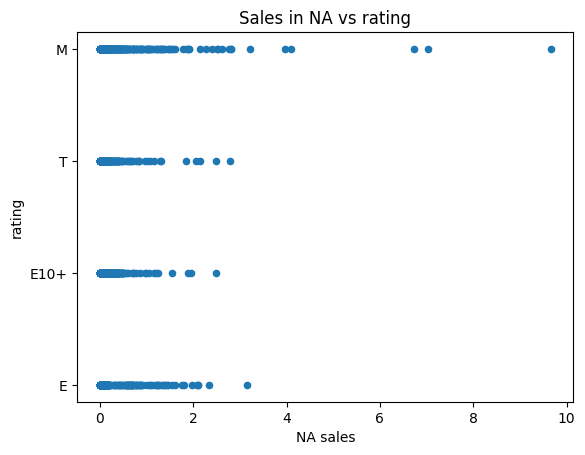

In [69]:
# Graficar ventas en NA contra ESRB
na_sales_rating_sorted.plot(kind='scatter',
                    x='na_sales',
                    y='rating')
plt.title('Sales in NA vs rating')
plt.xlabel('NA sales')
plt.show()

In [70]:
na_sales_rating_sorted['rating'].astype(object)

12265    E
7575     E
2600     E
7579     E
13384    E
        ..
6275     M
6544     M
6549     M
6081     M
16692    M
Name: rating, Length: 1264, dtype: object

In [73]:
# Calcular la correlación de las ventas de NA y el rating
# Se utiliza el metodo spearman porque contiene varibles categoricas
corr_na_sales_rating = na_sales_rating_sorted['rating'].corr(na_sales_rating_sorted['na_sales'], method='spearman')
print(f"Correlation between sales and rating: {corr_na_sales_rating}")

Correlation between sales and rating: -0.05199364740850875


Correlación negativa débil, despreciable. Parece que los usuarios de NA, no les importa mucho la clasificación a la hora de comprar. Cuando aumenta el rating, las ventas decaen muy ligeramente, es insignificante.

In [74]:
# Filtrar para clasificación ESRB y ventas para EU
eu_sales_rating = df_games_2013to2016[['eu_sales','rating']]

# Eliminar los valores unknown y RP para el metodo spearman, ya que las clasificaciones deben estar ordenadas
eu_sales_rating = eu_sales_rating[~(eu_sales_rating['rating']=='Unknown') & (~(eu_sales_rating['rating']=='RP'))]

# Convierte la columna rating a tipo category con el orden deseado
eu_sales_rating['rating'] = pd.Categorical(eu_sales_rating['rating'], categories=orden_esrb, ordered=True)

# Ordena el DataFrame por la columna 'ESRB'
eu_sales_rating_sorted = eu_sales_rating.sort_values(by='rating')

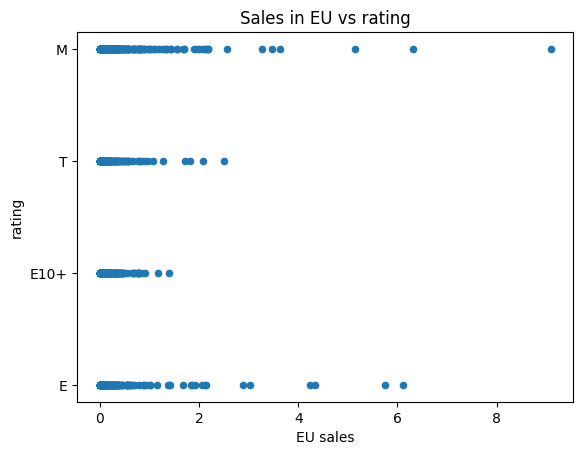

In [75]:
# Graficar ventas en EU contra ESRB
eu_sales_rating_sorted.plot(kind='scatter',
                    x='eu_sales',
                    y='rating')
plt.title('Sales in EU vs rating')
plt.xlabel('EU sales')
plt.show()

In [76]:
# Calcular la correlación de las ventas de EU y el rating
# Se utiliza el metodo spearman porque contiene varibles categoricas
corr_eu_sales_rating = eu_sales_rating_sorted['rating'].corr(eu_sales_rating_sorted['eu_sales'], method='spearman')
print(f"Correlation between sales and rating: {corr_eu_sales_rating}")

Correlation between sales and rating: -0.09975171803408124


Correlación positiva débil, es inisignificante. Parece que los usuarios de EU, les importa mas la clasifiación que los de NA, pero no es lo suficiemtente significante. Cuando aumenta el rating, las ventas suben muy ligeramente.

In [77]:
# Filtrar para clasificación ESRB y ventas para JP
jp_sales_rating = df_games_2013to2016[['jp_sales','rating']]

# Eliminar los valores unknown y RP para el metodo spearman, ya que las clasificaciones deben estar ordenadas
jp_sales_rating = jp_sales_rating[~(jp_sales_rating['rating']=='Unknown') & (~(jp_sales_rating['rating']=='RP'))]

# Convierte la columna rating a tipo category con el orden deseado
jp_sales_rating['rating'] = pd.Categorical(jp_sales_rating['rating'], categories=orden_esrb, ordered=True)

# Ordena el DataFrame por la columna 'ESRB'
jp_sales_rating_sorted = jp_sales_rating.sort_values(by='rating')

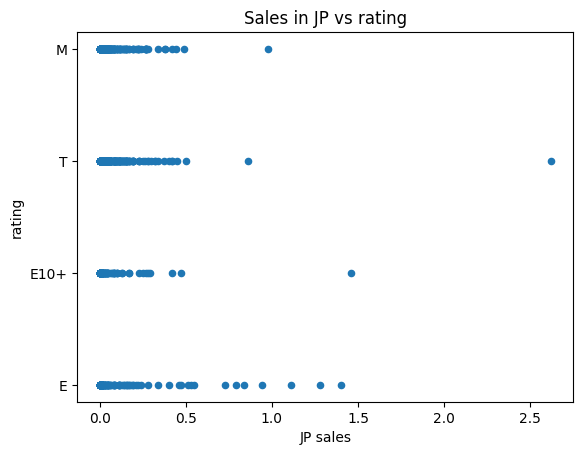

In [78]:
# Graficar ventas en JP contra ESRB
jp_sales_rating_sorted.plot(kind='scatter',
                    x='jp_sales',
                    y='rating')
plt.title('Sales in JP vs rating')
plt.xlabel('JP sales')
plt.show()

In [79]:
# Calcular la correlación de las ventas de JP y el rating
# Se utiliza el metodo spearman porque contiene varibles categoricas
corr_jp_sales_rating = jp_sales_rating_sorted['rating'].corr(jp_sales_rating_sorted['jp_sales'], method='spearman')
print(f"Correlation between sales and rating: {corr_jp_sales_rating}")

Correlation between sales and rating: 0.24226782527742782


Correlación positiva débil, muy pequeña. Parece que los usuarios de JP, estan un poco mas interesados en la clasificación a la hora de comprar en comparación a las otras regiones. Cuando aumenta el rating, las ventas suben muy ligeramente.

# <a id='toc10_'></a>[Prueba las siguientes hipótesis:](#toc0_)

## <a id='toc10_1_'></a>[¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas?](#toc0_)

In [80]:
# Filtrar los datos por plataforma Xbox One y PC
df_xone_2013to2016 = df_games_2013to2016[df_games_2013to2016['platform']=='XOne']
df_pc_2013to2016 = df_games_2013to2016[df_games_2013to2016['platform']=='PC']

In [81]:
# Realizar la prueba de levene para ver si las varianzas son iguales o no
# con el objetivo de ajustar el parametro de la prueba t student

# Eliminar valores nan para levene
user_score_xone_2013to2016 = df_xone_2013to2016['user_score'].dropna()
users_score_pc_2013to2016 = df_xone_2013to2016['user_score'].dropna()

# Aplicar el test de Levene
statistic, p_value = st.levene(user_score_xone_2013to2016, users_score_pc_2013to2016)

# Mostrar los resultados
print("Estadística de Levene:", statistic)
print("Valor p:", p_value)

# Interpretación
alpha = 0.01  # Nivel de significancia
if p_value > alpha:
    print("No hay evidencia suficiente para rechazar la igualdad de varianzas.")
else:
    print("Hay diferencias significativas en las varianzas entre los grupos.")

Estadística de Levene: 0.0
Valor p: 1.0
No hay evidencia suficiente para rechazar la igualdad de varianzas.


In [82]:
# Definir hipótesis
# H0 (Hipótesis nula): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
# H1 (Hipótesis alternativa): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

# Prueba t student para comparar si las medias son significateivamente diferentes

# Definir un valor de significancia
alpha = 0.01

# Prueba t student para xbox y pc por la calificación de usuarios
resultado_test = st.ttest_ind(df_xone_2013to2016['user_score'], df_pc_2013to2016['user_score'], equal_var=True)

if resultado_test.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No hay evidencia suficiente para rechazar la hipótesis nula')

No hay evidencia suficiente para rechazar la hipótesis nula


## <a id='toc10_2_'></a>[¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?](#toc0_)

In [83]:
# Filtrar los datos por el género Accion y Deportes
df_accion_2013to2016 = df_games_2013to2016[df_games_2013to2016['genre']=='Action']
df_sports_2013to2016 = df_games_2013to2016[df_games_2013to2016['genre']=='Sports']

In [84]:
# Realizar la prueba de levene para ver si las varianzas son iguales o no
# con el objetivo de ajustar el parametro de la prueba t student

# Eliminar valores nan para levene
user_score_action_2013to2016 = df_xone_2013to2016['user_score'].dropna()
users_score_sports_2013to2016 = df_xone_2013to2016['user_score'].dropna()

# Aplicar el test de Levene
statistic, p_value = st.levene(user_score_action_2013to2016, users_score_sports_2013to2016)

# Mostrar los resultados
print("Estadística de Levene:", statistic)
print("Valor p:", p_value)

# Interpretación
alpha = 0.01  # Nivel de significancia
if p_value > alpha:
    print("No hay evidencia suficiente para rechazar la igualdad de varianzas.")
else:
    print("Hay diferencias significativas en las varianzas entre los grupos.")

Estadística de Levene: 0.0
Valor p: 1.0
No hay evidencia suficiente para rechazar la igualdad de varianzas.


In [85]:
# Definir hipótesis
# H0 (Hipótesis nula): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales.
# H1 (Hipótesis alternativa): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.

# Prueba t student para comparar si las medias son significateivamente diferentes

# Definir un valor de significancia
alpha = 0.01

# Prueba t student para los géneros Acción y Deportes por la calificación de usuarios
resultado_test = st.ttest_ind(df_accion_2013to2016['user_score'], df_sports_2013to2016['user_score'], equal_var=True)

if resultado_test.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No hay evidencia suficiente para rechazar la hipótesis nula')

No hay evidencia suficiente para rechazar la hipótesis nula


No se puede rechazar la hipótesis nula. El promedio de las calificaciones de los usuarios del género de Accion y Deportes pueden ser iguales.

- Cómo formulaste las hipótesis nula y alternativa.
  
  La hipótesis nula la formule a partir de la pregunta, dejando todo neutro. La alternativa la formule siguiendo el cambio a la nula.  
    
    
- ¿Qué criterio utilizaste para probar las hipótesis y por qué?  
  
  Utilice un valor de significancia del 0.01, considero que es una tarea importante ya que el modelo sera para el siguiente año. Por eso use un valor estricto de 0.01 en vez de uno de 0.05. Curiosamente al usar 0.05, la hipótesis de las plataformas se rechazaba. 

# <a id='toc11_'></a>[Conlcusión general](#toc0_)

- En la limpieza de datos, se encontraron muchos valores ausentes en las columnas de calificación y clasificación. entre el 40-50% de los valores tuvieron que ser sustituidos por la palabra 'Unknown'.

- No se encontraron duplicados.

- Sin el nombre, probablemente las filas tampoco tendran un género.

- Algunos datos tenian el año puesto en el nombre del videojuego.

- Existen demasiados valores atípicos, tanto en las ventas como en las calificaciones. Eso puede hacer que los datos no esten bien balanceados.

- Los valores TBA se analizaron como NaN, igual para los valores RP en rating (por ser definido)

- Los valores ausentes en el año, se rellenaron con la mediana, por la presencia de valores atípicos.

- Existen muchos mas juegos lanzados entre el 2008 al 2011. 

- Ultimamente las ventas de los videojuegos de este dataset, estan en tendencia negativa. Los picos mas altos estan entre el 2008 al 2011.

- Se analizaron los datos del 2013 en adelante, que es cuando las plataformas antiguas desaparecen y nuevas plataformas aparecen con ventas superiores. Estos son versiones nuevas que sustituyen  las plataformas antiguas.

- PC es la unica plataforma que sobrevive desde 1985, actualmente es la 4ta mas rentable del 2016.
- El top 3 es PS4, XOne y 3DS para el año 2016.

- Las reseñas de los usuarios realmente no afectan tanto las ventas.

- La clasificacion tampoco afecta significativamente las ventas.

- Los mismos juegos para diferentes plataformas tienen una mediana similar en ventas.

- En el mercado, se venden mas juegos de accion, habiendo mas de 600 juegos, en segundo lugar tiene menos de 300. Entre el 2005 al 2016.

- Los juegos géneros mas rentables son acción, shooter y roleplaying en general.

- Los menos rentables son puzzle, adventure y fighting. Esto se puede deber a la curva de aprendizaje más díficil y ser para publico mas especializado.

- PS4 es la plataforma mas rentable de NA.

- PS4 es la plataforma mas rentable de EU.

- 3DS es la plataforma mas rentable de JP. Prefieren plataformas portatiles.

- Las ventas de NA son superiores a las ventas de JP y EU.

- Los géneros mas rentables son Action, Shooter y Role-playing en general.

- Los gustos en NA y EU son iguales para el top 4 de géneros.

- JP prefiere los juegos de rol.

- La media de calificaciones de usuario para el género de acción y deportes son iguales.